Metody zpracování signálu v časové oblasti
- **konvoluce**
- kovariance
- korelace


Konvoluce signálu
- určuje odezvu signálu $x[t]$ na impuls $h[t]$
- signál je reprezentován jako lineární systém
- oprace konvoluce se značí symbolem $*$
- využití konvoluce (grafické operace, strojové učení )
 
Spojitá defincie konvoluce signálu

$$x[t]*h[t] = \int_{-\infty}^{\infty} x[\tau]\cdot h[t - \tau] {\rm d} \tau$$

Diskrétní definice konvoluce signálu

$$x[k]*h[k]=y[k] \rightarrow x[k]*h[k] = \sum_{i=-\infty}^{+\infty} x[i]\cdot h[k-i]$$

Odezva tří impulsů $y[t]$ v signálu $x[t]$. Filtr $h[t]$ je reprezentován lineárním systémem.

- Obrázky převzaty z S. W. Smith, The Scientist and Engineer's Guide to Digital Signal Processing 1st Edition, California Technical Pub, 1997, ISBN 0966017633. 
- zdroj lze najít v pdf na http://www.dspguide.com/


![](2022-10-17-15-49-04.png)

Konvoluce obdélníkového signálu s exponenciálním poklesem vypadá následovně

![](2022-10-17-15-57-48.png)


Nagenerujte Obdélníkový signál (jedna perioda) a proveďte jeho konvoluci s funkcí 
$$ h(t) = \alpha e^{-at} $$

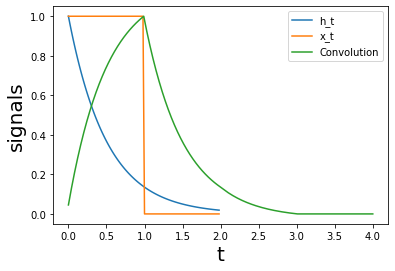

In [6]:
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt

def Kernel(alpha,tvec,a):
    h_t = alpha*np.exp(-a*tvec)
    return np.array(h_t)

n_length = 100;

tvec = np.linspace(0,2,n_length,endpoint=False);

#generate convolution kernel
h_t = Kernel(1.0,tvec,2.0);

# one period of square wave in range(0,1) zero the others
x_t = sp.signal.square(2*np.pi*0.5*tvec);

x_t = np.where(tvec >= 1.0,0,x_t)

plt.plot(tvec,h_t,label="h_t");
plt.plot(tvec,x_t,label="x_t");

Conv=np.convolve(x_t,h_t,mode='full')

#rescale to (0,1)
Conv = Conv/np.max(Conv)

t_Conv = np.linspace(0,4,np.max(Conv.shape))

#plot results
plt.plot(t_Conv,Conv,label="Convolution")
plt.xlabel("t",fontsize=20)
plt.ylabel("signals",fontsize=20)
plt.legend(loc="upper right");

plt.show();

Proveďte konvoluci signálů o délce několika period pro 
- obdélníkový signál
- pilový/trojúhelníkový signál

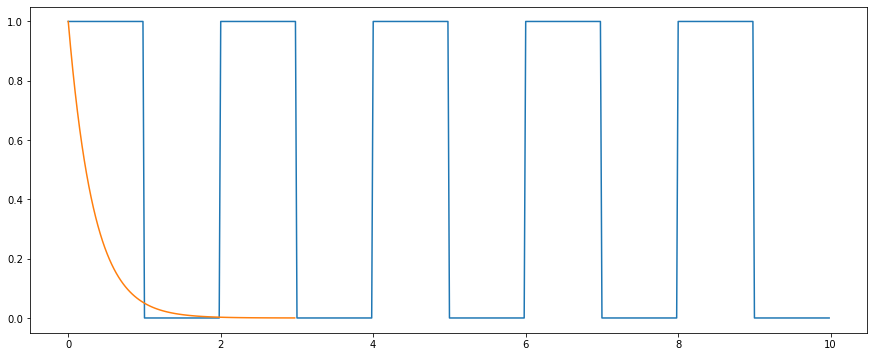

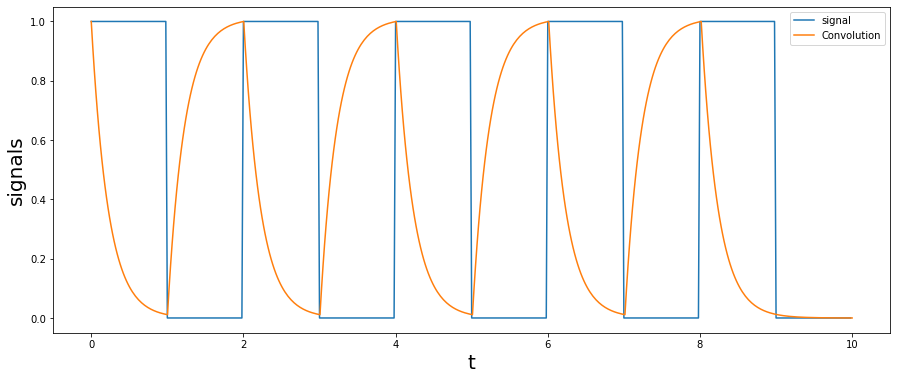

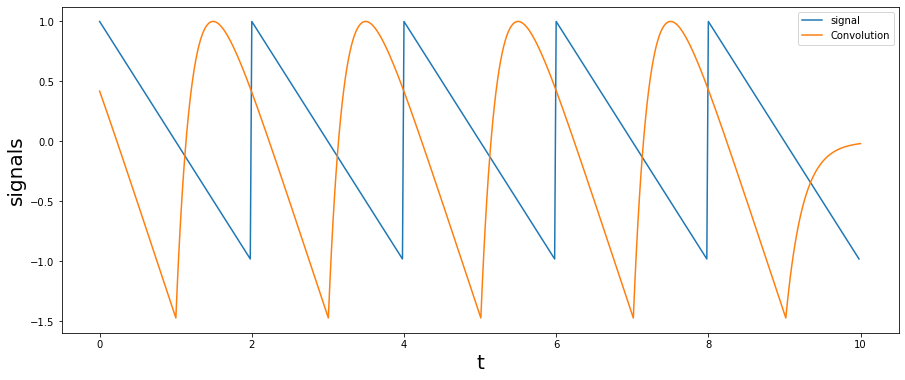

In [56]:
n_length = 500;
n_length_h = 100;

tvec = np.linspace(0,10,n_length, endpoint=False);
tvec_h = np.linspace(0,3,n_length_h, endpoint=False);

x_t = sp.signal.square(2*np.pi*0.5*tvec);
x_t = np.where(x_t < 0.0,0,x_t) #limit to range (0,1)

x_triang=sp.signal.sawtooth(2*np.pi*0.5*tvec,0.0)

h_t = Kernel(1.0,tvec_h,3);

#initial plot of square and kernel
plt.plot(tvec,x_t,label="x_t");
plt.plot(tvec_h,h_t,label="h_t");
plt.show();

#conovlutions
Conv=np.convolve(x_t,h_t,mode='same')
ConvTriang=np.convolve(x_triang,h_t,mode='same')

#rescale to (0,1)
Conv = Conv/np.max(Conv)
ConvTriang = ConvTriang/np.max(ConvTriang)

#conovlution time vector
t_Conv = np.linspace(0,10,np.max(Conv.shape))

#plotting 
plt.plot(tvec,x_t,label="signal")
plt.plot(t_Conv,Conv,label="Convolution")
plt.xlabel("t",fontsize=20)
plt.ylabel("signals",fontsize=20)
plt.legend(loc="upper right");
plt.show();

plt.plot(tvec,x_triang,label="signal")
plt.plot(t_Conv,ConvTriang,label="Convolution")
plt.xlabel("t",fontsize=20)
plt.ylabel("signals",fontsize=20)
plt.legend(loc="upper right");
plt.show();

Proveďte konvoluci sinové funkce s náhodným šumem s vhodně vybraným konvolučním jádrem
- sinová vlna (jedna perioda)
- exponenciální funkce
- obdélníkový signál
- pilový signál
- neperiodický/náhodný signál

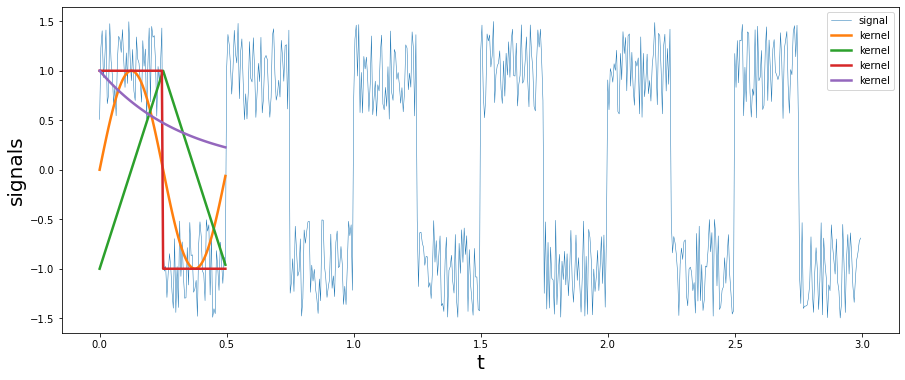

In [15]:
n_length = 500;
Amp=1.0;

numT=6;
f = 2;
A0=1.0;
T=1/f;
Tmax = numT*T;
n_length=numT*100;

tvec = np.linspace(0,Tmax,n_length, endpoint=False);


Err = 2*np.random.rand(n_length)-1
#x_t = A0*np.sin(2*np.pi*f*tvec) + Amp*Err/2. 
#x_t = sp.signal.sawtooth(2*np.pi*f*tvec,0.5) + 2*Err-1
x_t = sp.signal.square(2*np.pi*f*tvec) + Amp*Err/2.
#x_t = 2*Err-1
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(tvec,x_t, linewidth=0.5,label="signal")

#define convolution kernels
n_length_k = 100;
tvec_k = np.linspace(0,T,n_length_k, endpoint=False);
CKexp=h_t = Kernel(1.0,tvec_k,3);
CKsine = np.sin(2*np.pi*f*tvec_k)
CKTriag = sp.signal.sawtooth(2*np.pi*f*tvec_k,0.5)
CKSquare = sp.signal.square(2*np.pi*f*tvec_k);
c= 2*Kernel(1.0,tvec_k,10)-1;

plt.plot(tvec_k,CKsine,tvec_k,CKTriag, tvec_k,CKSquare, tvec_k, CKexp,linewidth=2.5,label="kernel")

plt.xlabel("t",fontsize=20)
plt.ylabel("signals",fontsize=20)
plt.legend(loc="upper right");
plt.show();


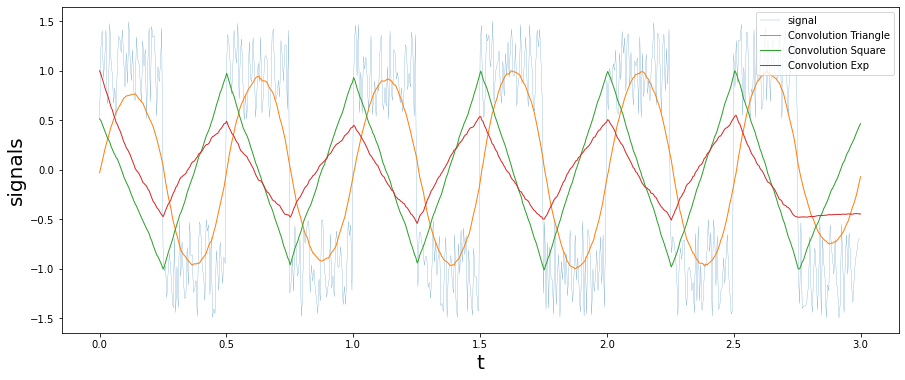

In [16]:
# perform convolution and plot results
Conv=np.convolve(x_t,CKsine,mode='same')
ConvTriag=np.convolve(x_t,CKTriag,mode='same')
ConvSquare=np.convolve(x_t,CKSquare,mode='same')
ConvExp=np.convolve(x_t,CKexp,mode='same')

#rescale to (0,1)
Conv = Conv/np.max(Conv)
ConvTriag = ConvTriag/np.max(ConvTriag)
ConvSquare = ConvSquare/np.max(ConvSquare)
ConvExp = ConvExp/np.max(ConvExp)

#convolution time vector
t_Conv = np.linspace(0,Tmax,np.max(Conv.shape))

plt.plot(tvec,x_t,linewidth=0.2,label="signal")
#plt.plot(t_Conv,Conv,linewidth=2.5,label="Convolution Sine")
plt.plot(t_Conv,ConvTriag,linewidth=1.0,label="Convolution Triangle")
plt.plot(t_Conv,ConvSquare,linewidth=1.0,label="Convolution Square")
plt.plot(t_Conv,ConvExp,linewidth=1.0,label="Convolution Exp")
plt.xlabel("t",fontsize=20)
plt.ylabel("signals",fontsize=20)
plt.legend(loc="upper right");
plt.show();